In [ ]:
%%shell
jupyter nbconvert --to html /content/IM_Analysis.ipynb

[NbConvertApp] Converting notebook /content/IM_Analysis.ipynb to html
[NbConvertApp] Writing 1650166 bytes to /content/IM_Analysis.html


In [ ]:
pip install geopandas 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 4.4 MB/s 
     |████████████████████████████████| 7.8 MB 34.6 MB/s 
     |████████████████████████████████| 16.6 MB 126 kB/s 
ERROR: Operation cancelled by user


In [ ]:
pip install Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 174 kB 3.0 MB/s 
     |████████████████████████████████| 2.2 MB 9.0 MB/s 


In [ ]:
pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install geoplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached geopandas-0.12.2-py3-none-any.whl (1.1 MB)
     |████████████████████████████████| 10.9 MB 7.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 38.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 34.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 30.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 37.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 49.9 MB/s 
  Installing build dependencies ... done
  Ge

Import Libraries


In [ ]:
# import all necesary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
import calendar
import plotly as pt
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from pylab import *
import matplotlib.patheffects as PathEffects

import descartes
import geopandas as gpd
from Levenshtein import distance
from itertools import product
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from scipy.spatial.distance import pdist, squareform
from shapely.geometry import Point, Polygon

import geoplot
from geopy.geocoders import Nominatim

import warnings
warnings.filterwarnings('ignore')


plt.rcParams['font.family'] = "Microsoft JhengHei UI Light"
plt.rcParams['font.serif'] = ["Microsoft JhengHei UI Light"]

In [ ]:
from google.colab import files


uploaded = files.upload()


Saving US_Accidents_Dec21_updated.csv to US_Accidents_Dec21_updated.csv


In [ ]:
df= pd.read_csv('US_Accidents_Dec21_updated.csv')

In [ ]:
print('The Dataset Contains, Rows: {:,d} & Columns: {}'.format(df.shape[0], df.shape[1]))

The Dataset Contains, Rows: 2,845,342 & Columns: 47


In [ ]:
# convert the Start_Time & End_Time Variable into Datetime Feature
df.Start_Time = pd.to_datetime(df.Start_Time)
df.End_Time = pd.to_datetime(df.End_Time)

In [ ]:
# create a dataframe of city and their corresponding accident cases
city_df = pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Cases'})

In [ ]:
# create a dataframe of city and their corresponding accident cases
city_df = pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Cases'})

In [ ]:
top_10_cities = pd.DataFrame(city_df.head(10))

TypeError: ignored

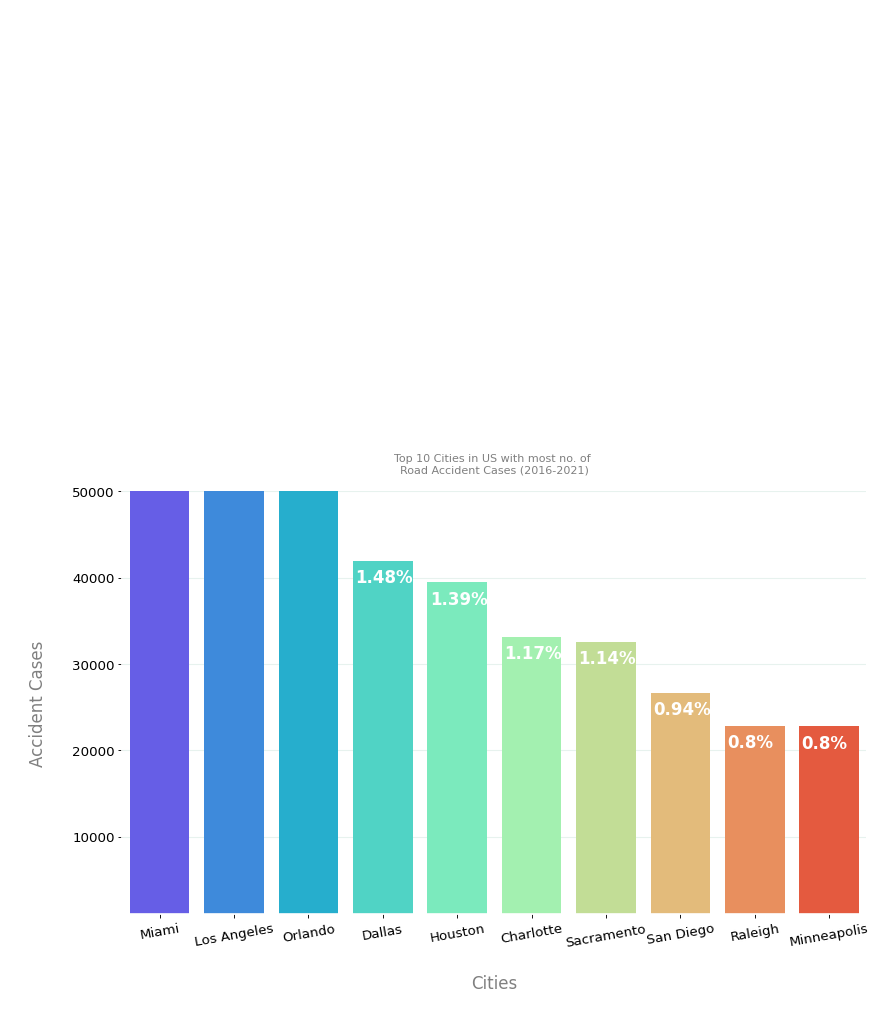

In [ ]:
fig, ax = plt.subplots(figsize = (12,7), dpi = 80)

cmap = cm.get_cmap('rainbow', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=top_10_cities['Cases'], x=top_10_cities['City'], palette='rainbow')

total = sum(city_df['Cases'])
for i in ax.patches:
    ax.text(i.get_x()+.03, i.get_height()-2500, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15, weight='bold',
                color='white')

plt.title('\nTop 10 Cities in US with most no. of \nRoad Accident Cases (2016-2021)\n', size=10, color='grey')

plt.rcParams['font.family'] = "Microsoft JhengHei UI Light"
plt.rcParams['font.serif'] = ["Microsoft JhengHei UI Light"]

plt.ylim(1000, 50000)
plt.xticks(rotation=10, fontsize=12)
plt.yticks(fontsize=12)

ax.set_xlabel('\nCities\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['bottom', 'left']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    
right_side = ax.spines["right"]
right_side.set_visible(False)
top_side = ax.spines["top"]
top_side.set_visible(False)

ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)
MA = mpatches.Patch(color=clrs[0], label='City with Maximum\n no. of Road Accidents')
ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=clrs[0], edgecolor='white');
plt.show()


In [ ]:
hightest_cases = city_df.Cases[0]
print(round(hightest_cases/5))
print(round(hightest_cases/(5*365)))

21393
59


In [ ]:
def city_cases_percentage(val, operator):
    if operator == '<':
        res = city_df[city_df['Cases']<val].shape[0]
    elif operator == '>':
        res = city_df[city_df['Cases']>val].shape[0]
    elif operator == '=':
        res = city_df[city_df['Cases']==val].shape[0]
    print(f'{res} Cities, {round(res*100/city_df.shape[0], 2)}%')
    
    
city_cases_percentage(1, '=')
city_cases_percentage(100, '<')
city_cases_percentage(1000, '<')
city_cases_percentage(1000, '>')
city_cases_percentage(5000, '>')
city_cases_percentage(10000, '>')
## change these to match our nums

1110 Cities, 9.5%
8727 Cities, 74.71%
11185 Cities, 95.75%
494 Cities, 4.23%
71 Cities, 0.61%
34 Cities, 0.29%


In [ ]:
# create a dictionary using US State code and their corresponding Name
us_states = {'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MP': 'Northern Mariana Islands',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VI': 'Virgin Islands',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming'}

# create a dataframe of State and their corresponding accident cases
state_df = pd.DataFrame(df['State'].value_counts()).reset_index().rename(columns={'index':'State', 'State':'Cases'})


# Function to convert the State Code with the actual corressponding Name
def convert(x): return us_states[x]

state_df['State'] = state_df['State'].apply(convert)


top_ten_states_name = list(state_df['State'].head(10))

TypeError: ignored

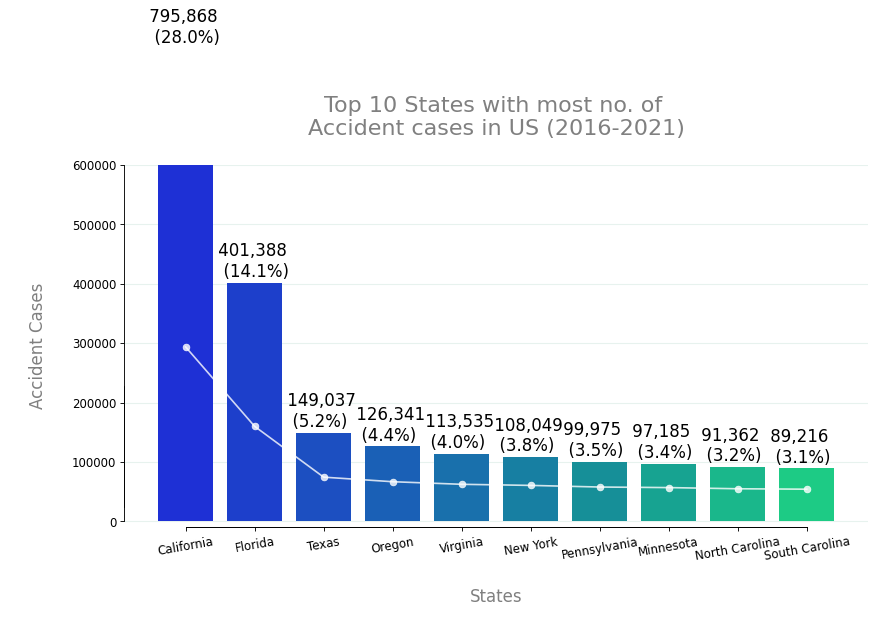

In [ ]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

cmap = cm.get_cmap('winter', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=state_df['Cases'].head(10), x=state_df['State'].head(10), palette='winter')
ax1 = ax.twinx()
sns.lineplot(data = state_df[:10], marker='o', x='State', y='Cases', color = 'white', alpha = .8)


total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()-0.2, i.get_height()+10000, \
            ' {:,d}\n  ({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 1)), fontsize=15,
                color='black')


ax.set(ylim =(-10000, 600000))
ax1.set(ylim =(-100000, 1700000))

plt.title('\nTop 10 States with most no. of \nAccident cases in US (2016-2021)\n', size=20, color='grey')
ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nStates\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['top','right']:
    side1 = ax.spines[i]
    side1.set_visible(False)
    side2 = ax1.spines[i]
    side2.set_visible(False)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

ax.spines['bottom'].set_bounds(0.005, 9)
ax.spines['left'].set_bounds(0, 600000)
ax1.spines['bottom'].set_bounds(0.005, 9)
ax1.spines['left'].set_bounds(0, 600000)
ax.tick_params(axis='y', which='major', labelsize=10.6)
ax.tick_params(axis='x', which='major', labelsize=10.6, rotation=10)

MA = mpatches.Patch(color=clrs[0], label='State with Maximum\n no. of Road Accidents')
ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=clrs[0], edgecolor='white');

TypeError: ignored

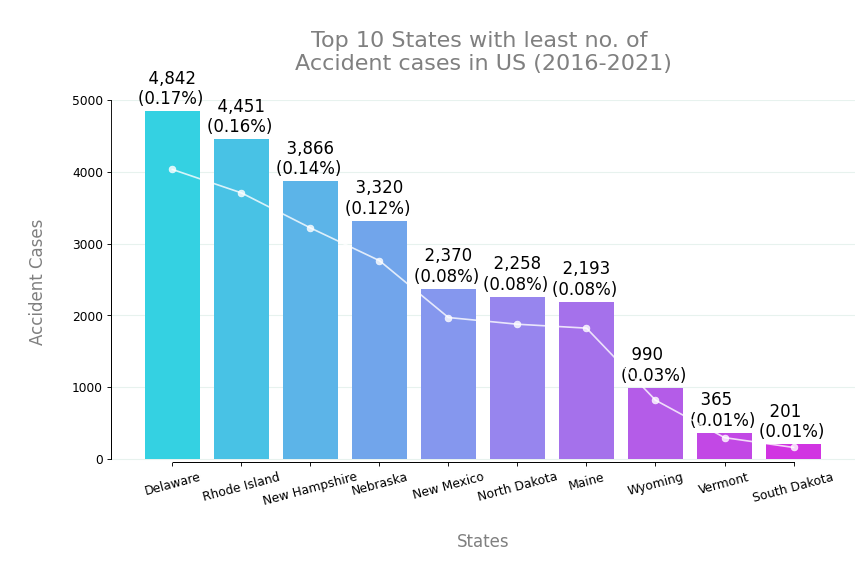

In [ ]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

cmap = cm.get_cmap('cool', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=state_df['Cases'].tail(10), x=state_df['State'].tail(10), palette='cool')
ax1 = ax.twinx()
sns.lineplot(data = state_df[-10:], marker='o', x='State', y='Cases', color = 'white', alpha = .8)

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()-0.1, i.get_height()+100, \
            '  {:,d}\n({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 2)), fontsize=15,
                color='black')

ax.set(ylim =(-50, 5000))
ax1.set(ylim =(-50, 6000))

plt.title('\nTop 10 States with least no. of \nAccident cases in US (2016-2021)\n', size=20, color='grey')
ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nStates\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['top', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    side1 = ax1.spines[i]
    side1.set_visible(False)
    
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

ax.spines['bottom'].set_bounds(0.005, 9)
ax.spines['left'].set_bounds(0, 5000)
ax1.spines['bottom'].set_bounds(0.005, 9)
ax1.spines['left'].set_bounds(0, 5000)
ax.tick_params(axis='y', which='major', labelsize=11)
ax.tick_params(axis='x', which='major', labelsize=11, rotation=15)

MI = mpatches.Patch(color=clrs[-1], label='State with Minimum\n no. of Road Accidents')
ax.legend(handles=[MI], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=clrs[-1], edgecolor='white');

In [ ]:
# create a dataframe of Street and their corresponding accident cases
street_df = pd.DataFrame(df['Street'].value_counts()).reset_index().rename(columns={'index':'Street No.', 'Street':'Cases'})

In [ ]:
top_ten_streets_df = pd.DataFrame(street_df.head(10))

TypeError: ignored

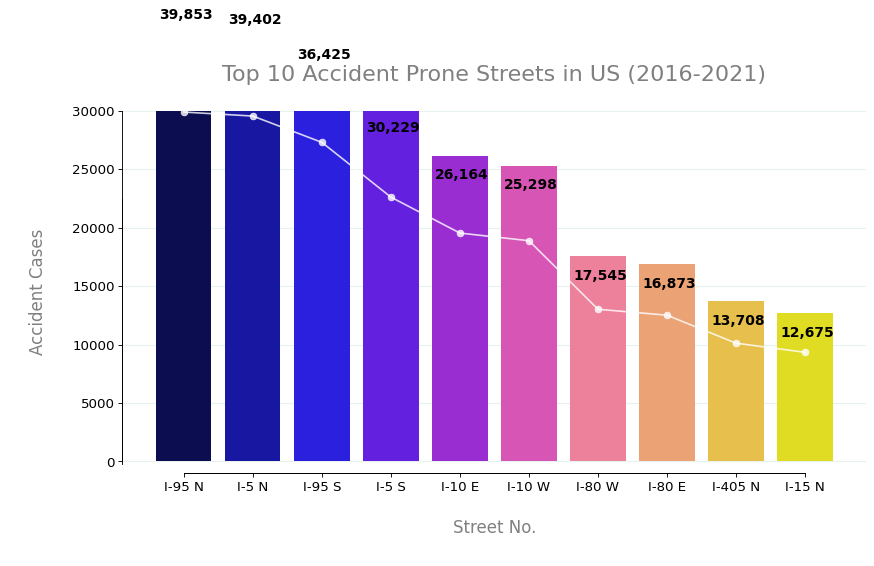

In [ ]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
        
cmap = cm.get_cmap('gnuplot2', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(y=top_ten_streets_df['Cases'], x=top_ten_streets_df['Street No.'], palette='gnuplot2')
ax1 = ax.twinx()
sns.lineplot(data = top_ten_streets_df, marker='o', x='Street No.', y='Cases', color = 'white', alpha = .8)

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.04, i.get_height()-2000, \
            '{:,d}'.format(int(i.get_height())), fontsize=12.5,weight='bold',
                color='black')
    
ax.axes.set_ylim(-1000, 30000)
ax1.axes.set_ylim(-1000, 40000)
plt.title('\nTop 10 Accident Prone Streets in US (2016-2021)\n', size=20, color='grey')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nStreet No.\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['top','right']:
    side1 = ax.spines[i]
    side1.set_visible(False)
    side2 = ax1.spines[i]
    side2.set_visible(False)

    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

ax.spines['bottom'].set_bounds(0.005, 9)
ax.spines['left'].set_bounds(0, 30000)
ax1.spines['bottom'].set_bounds(0.005, 9)
ax1.spines['left'].set_bounds(0, 30000)
ax.tick_params(axis='both', which='major', labelsize=12)

MA = mpatches.Patch(color=clrs[1], label='Street with Maximum\n no. of Road Accidents')
MI = mpatches.Patch(color=clrs[-2], label='Street with Minimum\n no. of Road Accidents')
ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=[clrs[1], 'grey'], edgecolor='white');

In [ ]:
# create a dataframe of Severity and the corresponding accident cases
severity_df = pd.DataFrame(df['Severity'].value_counts()).rename(columns={'index':'Severity', 'Severity':'Cases'})

In [ ]:
fig = go.Figure(go.Funnelarea(
    text = ["Severity - 2","Severity - 3", "Severity - 4", "Severity - 1"],
    values = severity_df.Cases,
    title = {"position": "top center", 
             "text": "<b>Impact on the Traffic due to the Accidents</b>", 
             'font':dict(size=18,color="#7f7f7f")},
    marker = {"colors": ['#14a3ee', '#b4e6ee', '#fdf4b8', '#ff4f4e'], # we can change these colors
                "line": {"color": ["#e8e8e8", "wheat", "wheat", "wheat"], "width": [7, 0, 0, 2]}}
    ))

fig.show()

Accident Duration Analysis

In [ ]:
accident_duration_df = pd.DataFrame(df['End_Time'] - df['Start_Time']).reset_index().rename(columns={'index':'Id', 0:'Duration'})

In [ ]:
top_10_accident_duration_df = pd.DataFrame(accident_duration_df['Duration'].value_counts().head(10).sample(frac = 1)).reset_index().rename(columns={'index':'Duration', 'Duration':'Cases'})

Duration = [str(i).split('days')[-1].strip() for i in top_10_accident_duration_df.Duration]

top_10_accident_duration_df['Duration'] = Duration

Month Analysis

In [ ]:
month_df = pd.DataFrame(df.Start_Time.dt.month.value_counts()).reset_index().rename(columns={'index':'Month', 'Start_Time':'Cases'}).sort_values('Month')

month_names = list(calendar.month_name)[1:]
month_df.Month = month_names

TypeError: ignored

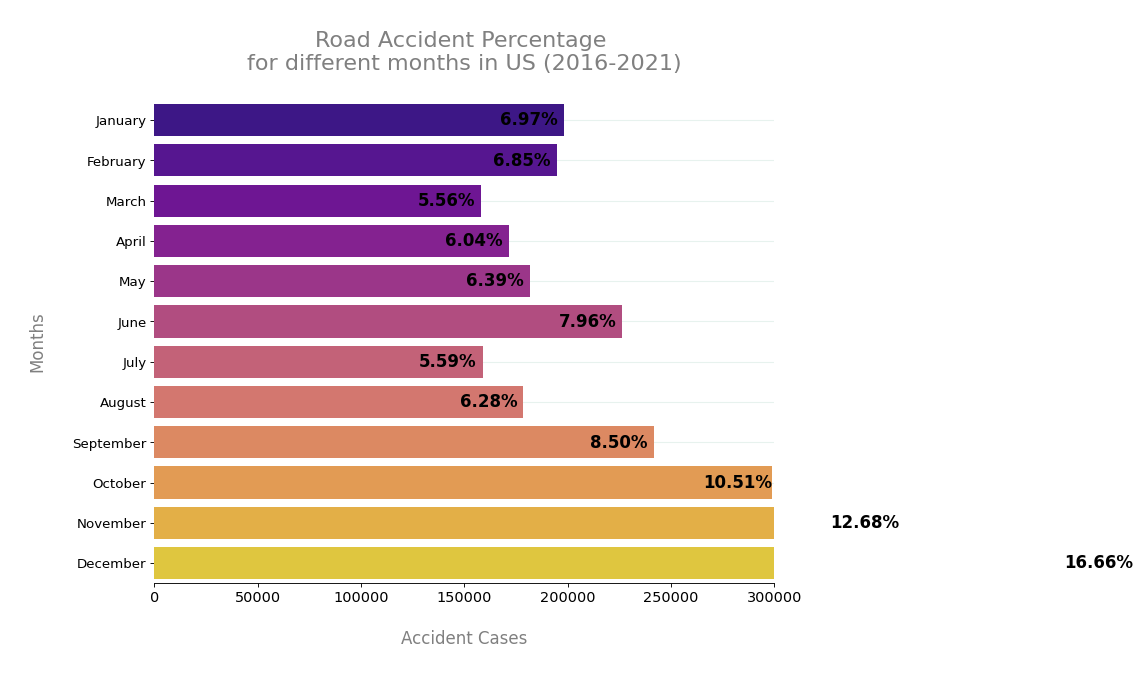

In [ ]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 80)

cmap = cm.get_cmap('plasma', 12)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(x=month_df['Cases'], y=month_df['Month'], palette='plasma')

total = df.shape[0]
for p in ax.patches:
    plt.text(p.get_width()-17000, p.get_y()+0.4,
            '{:.2f}%'.format(p.get_width()*100/total),ha='center', va='center', fontsize=15, color='black', weight='bold')

plt.title('\nRoad Accident Percentage \nfor different months in US (2016-2021)\n', size=20, color='grey')
plt.xlabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.ylabel('\nMonths\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(0, 300000)

for i in ['top', 'left', 'right']:
    side = ax.spines[i]
    side.set_visible(False)

ax.set_axisbelow(True)
ax.spines['bottom'].set_bounds(0, 300000)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

MA = mpatches.Patch(color=clrs[0], label='Month with Maximum\n no. of Road Accidents')
MI = mpatches.Patch(color=clrs[-1], label='Month with Minimum\n no. of Road Accidents')

ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=[clrs[0], 'grey'], edgecolor='white');

Day Analysis

In [ ]:
day_df = pd.DataFrame(df.Start_Time.dt.day_name().value_counts()).reset_index().rename(columns={'index':'Day', 'Start_Time':'Cases'})

TypeError: ignored

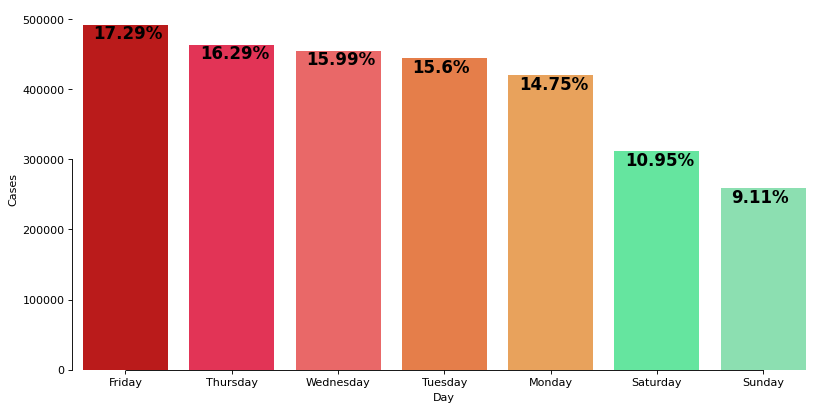

In [ ]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

ax=sns.barplot(y=day_df['Cases'], x=day_df['Day'], palette=['#D50000', '#FF1744', '#FF5252', '#ff7530', '#ffa245', '#50fa9d', '#7eedb0'])

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x()+0.1, i.get_height()-20000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,weight='bold',
                color='black')


for i in ['top', 'right']:
    side = ax.spines[i]
    side.set_visible(False)
    
ax.set_axisbelow(True)
ax.spines['bottom'].set_bounds(0.005, 6)
ax.spines['left'].set_bounds(0, 300000)

MA = mpatches.Patch(color='#D50000', label='Day with Maximum\n no. of Road Accidents')
MI = mpatches.Patch(color='#7eedb0', label='Day with Minimum\n no. of Road Accidents')

ax.legend(handles=[MA, MI], prop={'size': 10.5}, loc='best', borderpad=1, edgecolor='white', labelcolor=['#D50000', '#7eedb0']);


Hour Analysis

In [ ]:
hour_df = pd.DataFrame(df.Start_Time.dt.hour.value_counts()).reset_index().rename(columns={'index':'Hours', 'Start_Time':'Cases'}).sort_values('Hours')

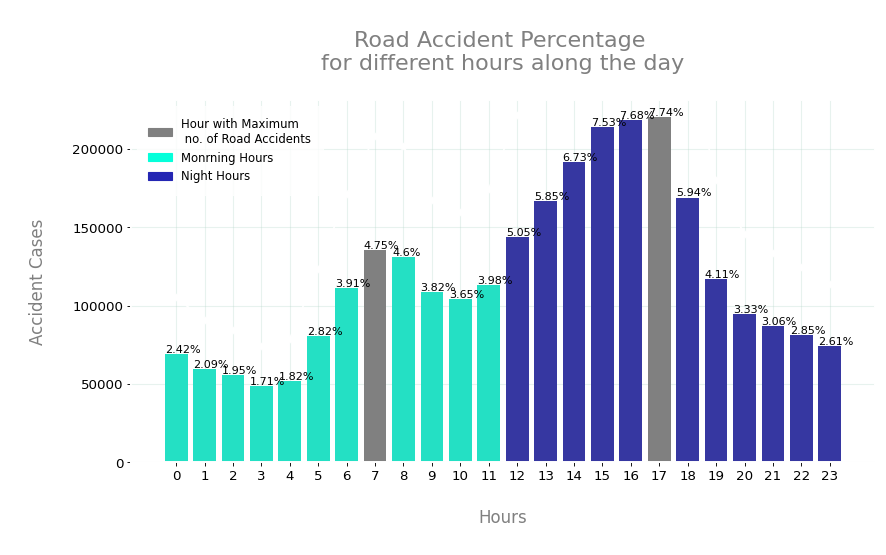

In [ ]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)

clrs = []
for x in hour_df['Cases']:
    if int(hour_df[hour_df['Cases']==x]['Hours']) <= 11:
        if (x == max(list(hour_df['Cases'])[:12])):
            clrs.append('grey')
        else:
            clrs.append('#05ffda')
    else:
        if (x == max(list(hour_df['Cases'])[12:])):
            clrs.append('grey')
        else:
            clrs.append('#2426b3')
ax=sns.barplot(y=hour_df['Cases'], x=hour_df['Hours'], palette=clrs)
ax1 = ax.twinx()

sns.lineplot(data = hour_df, marker='o', x='Hours', y='Cases', color = 'white', alpha = 1)

total = df.shape[0]
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+1000, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='black')

plt.ylim(1000, 150000)
plt.title('\nRoad Accident Percentage \nfor different hours along the day\n', size=20, color='grey')

ax1.axes.yaxis.set_visible(False)
ax.set_xlabel('\nHours\n', fontsize=15, color='grey')
ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')

for i in ['bottom', 'top', 'left', 'right']:
    ax.spines[i].set_color('white')
    ax.spines[i].set_linewidth(1.5)
    ax1.spines[i].set_color('white')
    ax1.spines[i].set_linewidth(1.5)
    
ax.set_axisbelow(True)
ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
ax.tick_params(axis='both', which='major', labelsize=12)

MA = mpatches.Patch(color='grey', label='Hour with Maximum\n no. of Road Accidents')
MO = mpatches.Patch(color='#05ffda', label='Monrning Hours')
NI = mpatches.Patch(color='#2426b3', label='Night Hours')

ax.legend(handles=[MA, MO, NI], prop={'size': 10.5}, loc='upper left', borderpad=1, edgecolor='white');

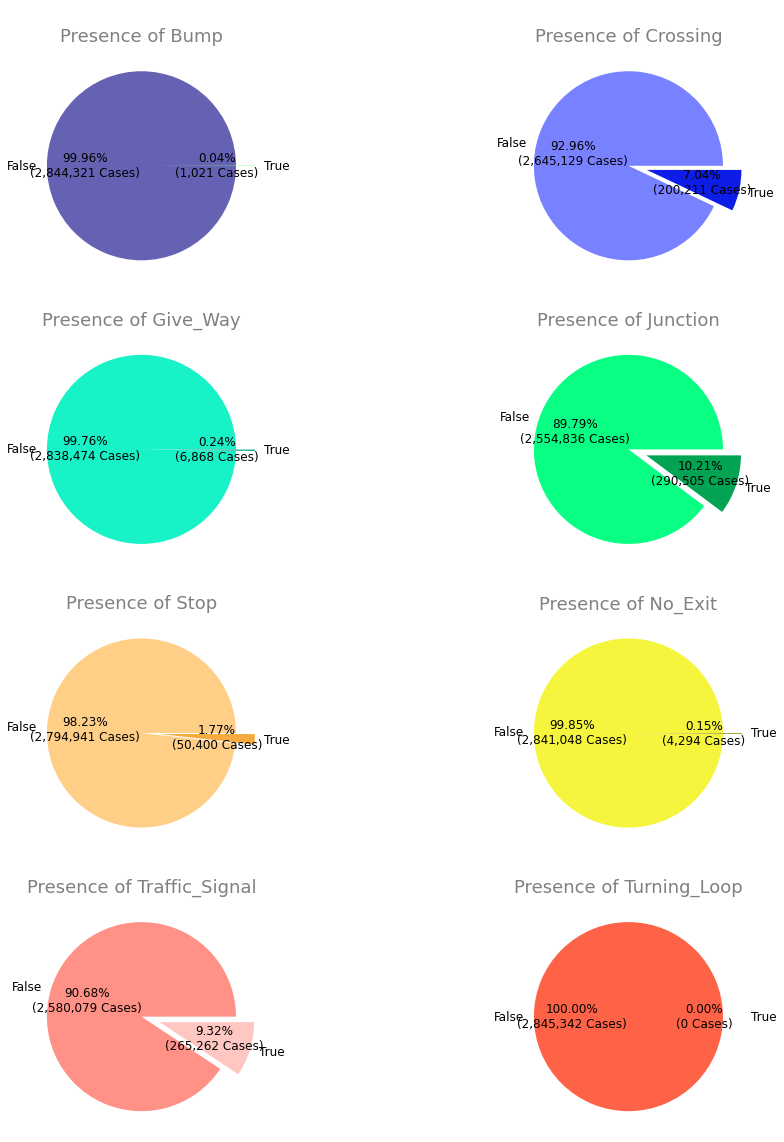

In [ ]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize = (16,20))

road_conditions = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'Stop', 'No_Exit', 'Traffic_Signal', 'Turning_Loop']
colors = [('#6662b3', '#00FF00'), ('#7881ff', '#0e1ce8'), ('#18f2c7', '#09ad8c'), ('#08ff83', '#02a352'), ('#ffcf87', '#f5ab3d'),
         ('#f5f53d', '#949410'), ('#ff9187', '#ffc7c2'), ('tomato', '#008000')]    
count = 0

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals), 2))
    return "{:.2f}%\n({:,d} Cases)".format(pct, absolute)    

for i in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    
    size = list(df[road_conditions[count]].value_counts())
    if len(size) != 2:
        size.append(0)
    
    labels = ['False', 'True']
    
    
    
    i.pie(size, labels = labels, colors = colors[count],
                    autopct = lambda pct: func(pct, size), labeldistance=1.1,
                    textprops={'fontsize': 12}, explode=[0, 0.2])

    title = '\nPresence of {}'.format(road_conditions[count])

    i.set_title(title, fontsize = 18, color='grey')
    
    count += 1

Weather Analysis

In [ ]:
def generate_intervals_labels(attribute, split, gap):
    var_min = min(df[attribute])
    intervals = [int(var_min)]
    labels = []
    for i in range(1, split+1):
        
        lower_limit = int(var_min+((i-1)*gap))
        
        if i==split:
            upper_limit = int(max(df[attribute]))
        else:
            upper_limit = int(var_min + (i*gap))
            
        #intervals
        intervals.append(upper_limit)
        
        # labels
        label_var = '({} to {})'.format(lower_limit, upper_limit)
        labels.append(label_var)    
    
    return intervals, labels

In [ ]:
def Feature_Bin_Plot(dataframe, attribute, clrs, intervals, labels, fig_size, font_size, y_lim, adjust, title):
    
    new_df = dataframe.copy()
    xlabel = 'Different {} Grouped Value'.format(attribute)
    new_df[xlabel] = pd.cut(x = new_df[attribute], bins = intervals, labels = labels, include_lowest=True)
    temp_df = pd.DataFrame(new_df[xlabel].value_counts()).reset_index().rename(columns={'index':'Bins', xlabel:'Cases'}).sort_values('Bins')
    
    count,max_index = 0, 0
    cases_list = list(temp_df['Cases'])
    for i in cases_list:
        if i == max(temp_df['Cases']):
            max_index = count
            break
        count += 1
                                                                                               
    total = len(new_df[xlabel])
    plt.figure(figsize=fig_size)
    
#     clrs = ['mediumspringgreen' if (x < max(temp_df['Cases'])) else 'grey' for x in temp_df['Cases']]
    cmap = cm.get_cmap(clrs, len(intervals))   
    clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]
    
    ax=sns.barplot(y=temp_df['Cases'], x=temp_df['Bins'], palette=clrs);
    
    for i in ax.patches:
        ax.text(i.get_x()+adjust[0], i.get_height()+adjust[-1], \
            '{:,d}\nCases\n({}%) '.format(int(i.get_height()), round(100*i.get_height()/total, 2)), fontsize=font_size,
                color='black')
        
    plt.title(title, size=20, color='grey')
    plt.ylim(y_lim)
    
    for i in ['bottom', 'top', 'left', 'right']:
        ax.spines[i].set_color('white')
        ax.spines[i].set_linewidth(1.5)
        
    ax.set_xlabel('\n{}\n'.format(xlabel), fontsize=15, color='grey')
    ax.set_ylabel('\nAccident Cases\n', fontsize=15, color='grey')
    
    ax.set_axisbelow(True)
    ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)
    ax.tick_params(axis='both', which='major', labelsize=12)
    MA = mpatches.Patch(color=clrs[max_index], label='{} Range with Maximum\n no. of Road Accidents'.format(attribute))
    ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
              labelcolor=[clrs[max_index]], edgecolor='white');

In [ ]:
weather_condition_df = pd.DataFrame(df.Weather_Condition.value_counts().head(10)).reset_index().rename(columns={'index':'Weather_Condition', 'Weather_Condition':'Cases'})

TypeError: ignored

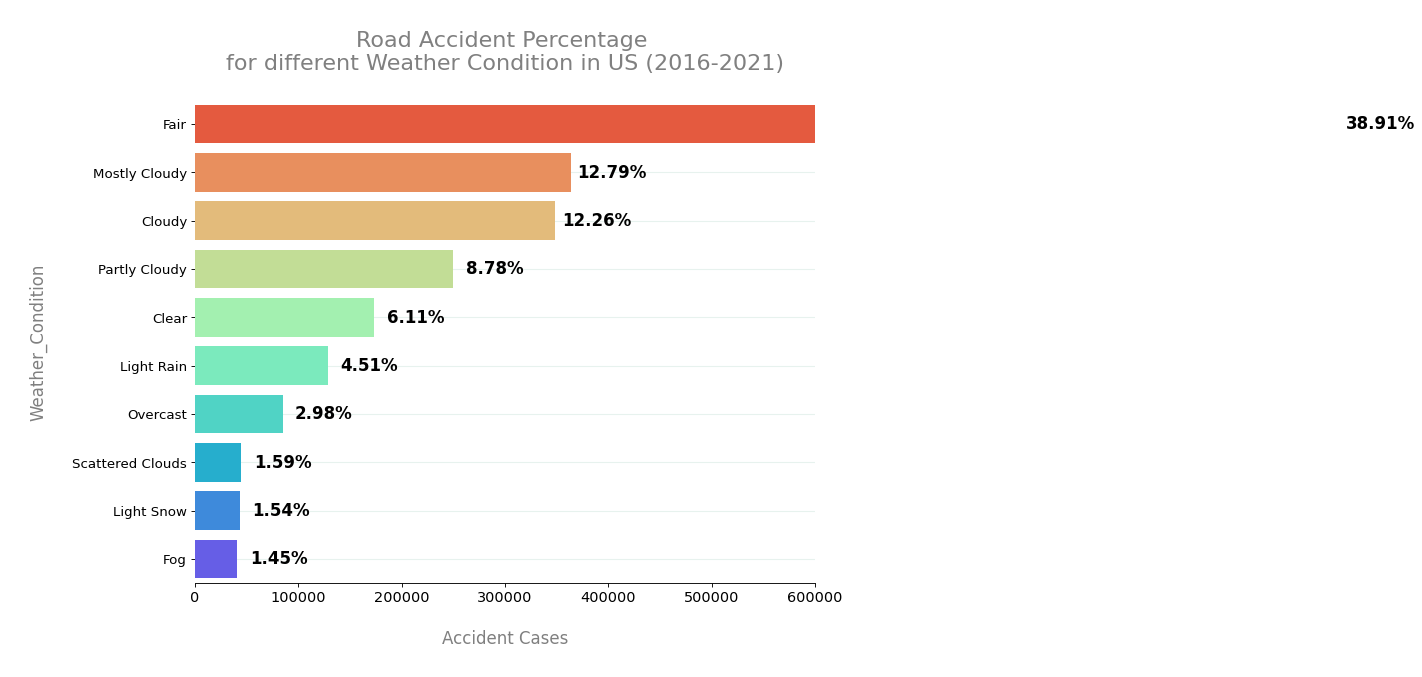

In [ ]:
fig, ax = plt.subplots(figsize = (10,8), dpi = 80)

cmap = cm.get_cmap('rainbow_r', 10)   
clrs = [matplotlib.colors.rgb2hex(cmap(i)) for i in range(cmap.N)]

ax=sns.barplot(x=weather_condition_df['Cases'], y=weather_condition_df['Weather_Condition'], palette='rainbow_r')

total = df.shape[0]
for p in ax.patches:
    plt.text(p.get_width()+40000, p.get_y()+0.4,
            '{:.2f}%'.format(p.get_width()*100/total),ha='center', va='center', fontsize=15, color='black', weight='bold')

plt.title('\nRoad Accident Percentage \nfor different Weather Condition in US (2016-2021)\n', size=20, color='grey')
plt.xlabel('\nAccident Cases\n', fontsize=15, color='grey')
plt.ylabel('\nWeather_Condition\n', fontsize=15, color='grey')
plt.xticks(fontsize=13)
plt.yticks(fontsize=12)
plt.xlim(0, 600000)

for i in ['top', 'left', 'right']:
    side = ax.spines[i]
    side.set_visible(False)

ax.set_axisbelow(True)
ax.spines['bottom'].set_bounds(0, 600000)
ax.grid(color='#b2d6c7', linewidth=1, axis='y', alpha=.3)

MA = mpatches.Patch(color=clrs[0], label='Weather_Condition with Maximum\n no. of Road Accidents')
ax.legend(handles=[MA], prop={'size': 10.5}, loc='best', borderpad=1, 
          labelcolor=[clrs[0]], edgecolor='white');